# Praca domowa 6
### Sebastian Deręgowski

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

Dowiedzmy się czegoś więcej o naszym zbiorze danych:

In [2]:
?fetch_olivetti_faces

In [3]:
data = fetch_olivetti_faces().data
images = fetch_olivetti_faces().images

In [4]:
print(f"Data shape: {data.shape}")
print(f"Images shape: {images.shape}")

Data shape: (400, 4096)
Images shape: (400, 64, 64)


`data` i `images` zawierają te same dane, tylko odpowiednio pogrupowane:

In [5]:
data[0][0:64]

array([0.30991736, 0.3677686 , 0.41735536, 0.44214877, 0.5289256 ,
       0.607438  , 0.6570248 , 0.677686  , 0.69008267, 0.6859504 ,
       0.70247936, 0.6983471 , 0.6942149 , 0.6983471 , 0.69008267,
       0.6942149 , 0.69008267, 0.6983471 , 0.70247936, 0.70247936,
       0.6983471 , 0.7066116 , 0.7107438 , 0.71900827, 0.72727275,
       0.75619835, 0.77272725, 0.7768595 , 0.7768595 , 0.75619835,
       0.76033056, 0.78099173, 0.76033056, 0.76859504, 0.75619835,
       0.73966944, 0.74380165, 0.73966944, 0.74380165, 0.71900827,
       0.71900827, 0.71487606, 0.71900827, 0.71900827, 0.7231405 ,
       0.72727275, 0.7355372 , 0.71487606, 0.7231405 , 0.71900827,
       0.71487606, 0.7107438 , 0.70247936, 0.7066116 , 0.6983471 ,
       0.677686  , 0.6570248 , 0.6322314 , 0.5661157 , 0.5247934 ,
       0.446281  , 0.37190083, 0.3305785 , 0.30578512], dtype=float32)

In [6]:
images[0][0]

array([0.30991736, 0.3677686 , 0.41735536, 0.44214877, 0.5289256 ,
       0.607438  , 0.6570248 , 0.677686  , 0.69008267, 0.6859504 ,
       0.70247936, 0.6983471 , 0.6942149 , 0.6983471 , 0.69008267,
       0.6942149 , 0.69008267, 0.6983471 , 0.70247936, 0.70247936,
       0.6983471 , 0.7066116 , 0.7107438 , 0.71900827, 0.72727275,
       0.75619835, 0.77272725, 0.7768595 , 0.7768595 , 0.75619835,
       0.76033056, 0.78099173, 0.76033056, 0.76859504, 0.75619835,
       0.73966944, 0.74380165, 0.73966944, 0.74380165, 0.71900827,
       0.71900827, 0.71487606, 0.71900827, 0.71900827, 0.7231405 ,
       0.72727275, 0.7355372 , 0.71487606, 0.7231405 , 0.71900827,
       0.71487606, 0.7107438 , 0.70247936, 0.7066116 , 0.6983471 ,
       0.677686  , 0.6570248 , 0.6322314 , 0.5661157 , 0.5247934 ,
       0.446281  , 0.37190083, 0.3305785 , 0.30578512], dtype=float32)

W łatwy sposób możemy przejść z jednej listy do drugiej (będzie to bardzo przydatne):

In [7]:
data_reshaped = data.reshape(data.shape[0],64,64)

In [8]:
if images.all()!=data_reshaped.all():
    print(False)

### 0. Narysowanie wybranych obrazów

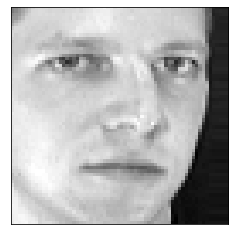

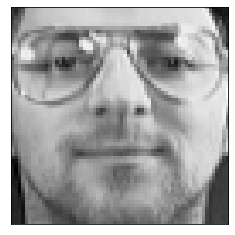

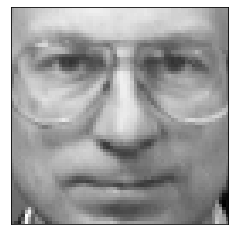

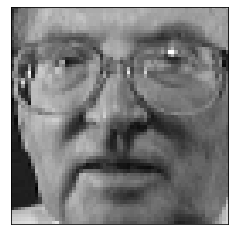

In [9]:
random_numbers = [1,64,121,333]
for i in random_numbers:
    plt.imshow(images[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

### 1. Kompresja przy pomocy PCA

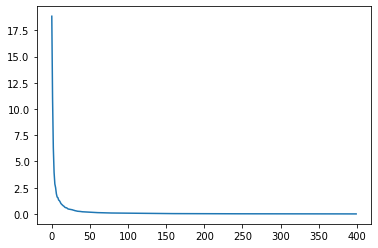

In [10]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(data)
plt.plot(pca.explained_variance_)
plt.show()

Możemy założyć, że powyżej 50 komponentów mamy taką samą wariancję, więc ustalmy liczbę komponentów na taką właśnie liczbę.

In [11]:
pca=PCA(n_components=50)
pca.fit(data)
data_pca=pca.transform(data)

Obliczmy stopień kompresji:

In [12]:
print(f"CR=50/4096={50/4096}")

CR=50/4096=0.01220703125


### 2. Transformacja odwrotna

In [13]:
data_inversed = pca.inverse_transform(data_pca)
data_inversed_reshaped = data_inversed.reshape(400,64,64)

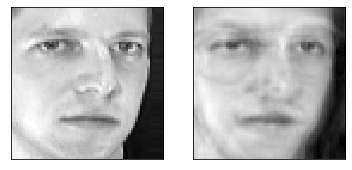

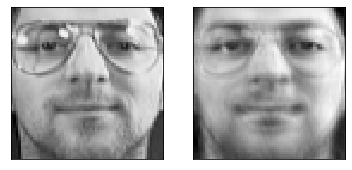

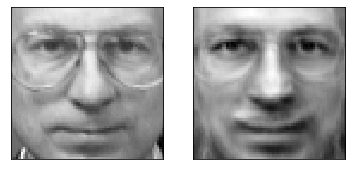

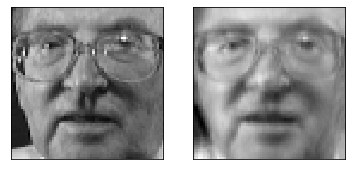

In [14]:
for i in random_numbers:
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(images[i],cmap='gray')
    ax[1].imshow(data_inversed_reshaped[i], cmap='gray')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.show()


Spodziewałem się o wiele gorszego rezultatu, mimo że skompresowano komponenty do 1% wyjściowej liczby, odwrotna kompresja przywróciła je w niemal "nienaruszonym" stanie. Dobrze pokazuje to również RMSE:

In [15]:
from sklearn.metrics import mean_squared_error
for i in random_numbers:
    print(f"RMSE (obrazek nr {i}): {mean_squared_error(data[i],data_inversed[i])}")

RMSE (obrazek nr 1): 0.002722197212278843
RMSE (obrazek nr 64): 0.003754116827622056
RMSE (obrazek nr 121): 0.0025733555667102337
RMSE (obrazek nr 333): 0.003817570861428976


### 3. Modyfikacje obrazów

Stwórzmy kilka różnych modyfikacji:

In [16]:
import copy
dark_images = copy.deepcopy(images)
for number in random_numbers:
    for i in range(64):
        for j in range(64):
            dark_images[number][i][j]= min(max(dark_images[number][i][j] - 0.5, 0), 1)

In [17]:
light_images = copy.deepcopy(images)
for number in random_numbers:
    for i in range(64):
        for j in range(64):
            light_images[number][i][j]= min(max(light_images[number][i][j] + 0.5, 0), 1)

In [18]:
negatives = copy.deepcopy(images)
for number in random_numbers:
    for i in range(64):
        for j in range(64):
            negatives[number][i][j]= 1-negatives[number][i][j]

In [19]:
transpose = copy.deepcopy(images)
for i in random_numbers:
    transpose[i]=np.transpose(transpose[i])

Pora na wizualizację:

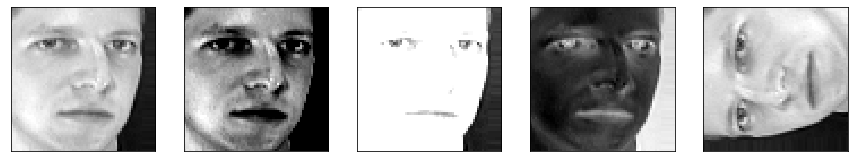

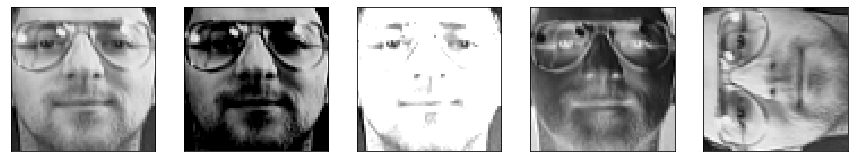

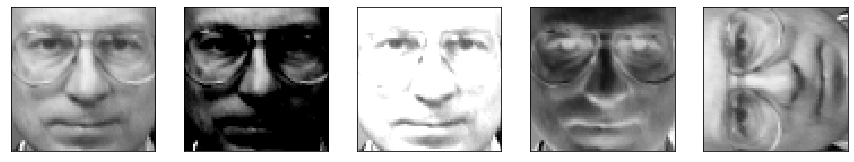

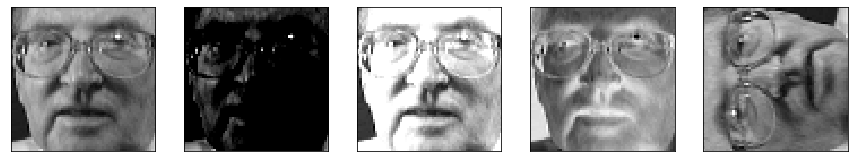

In [20]:
for i in random_numbers:
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
    ax[0].imshow(images[i],cmap='gray')
    ax[1].imshow(dark_images[i], cmap='gray')
    ax[2].imshow(light_images[i], cmap='gray')
    ax[3].imshow(negatives[i], cmap='gray')
    ax[4].imshow(transpose[i], cmap='gray')
    for j in range(5):
        ax[j].set_xticks([])
        ax[j].set_yticks([])
    plt.show()


### 4. Transformacje modyfikacji

In [21]:
def inverse(x):
    x_reshaped = x.reshape(400,4096)
    x_pca = pca.transform(x_reshaped)
    x_inversed = pca.inverse_transform(x_pca)
    x_inversed_reshaped = x_inversed.reshape(400,64,64)
    
    rmse = []

    for i in random_numbers:
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(3,3))
        ax[0].imshow(x[i],cmap='gray')
        ax[1].imshow(x_inversed_reshaped[i], cmap='gray')
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        ax[1].set_xticks([])
        ax[1].set_yticks([])
        plt.show()
        rmse.append(mean_squared_error(x_reshaped[i],x_inversed[i]))
    
    print(f"RMSE: {np.mean(rmse)}")
    print(f"Odchylenie standardowe: {np.std(rmse)}")

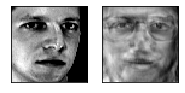

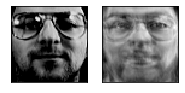

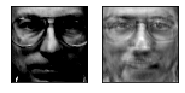

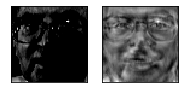

RMSE: 0.0037058969028294086
Odchylenie standardowe: 0.0011797958286479115


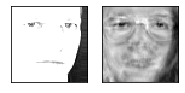

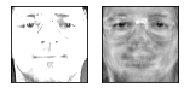

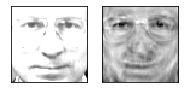

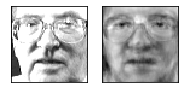

RMSE: 0.004602526314556599
Odchylenie standardowe: 0.0008196970447897911


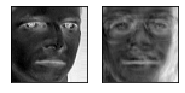

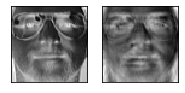

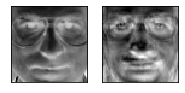

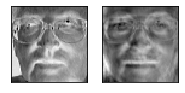

RMSE: 0.00709695927798748
Odchylenie standardowe: 0.000436850794358179


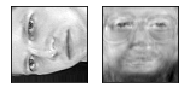

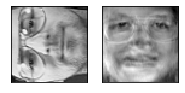

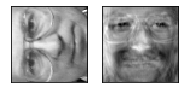

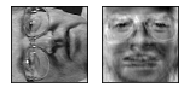

RMSE: 0.011325853876769543
Odchylenie standardowe: 0.00263862288556993


In [22]:
modifications = [dark_images,light_images,negatives,transpose]

for modification in modifications:
    inverse(modification)

RMSE w trzech pierwszych przypadkach jest tego samego rzędu wielkości co te obliczone w punkcie 2. Największe RMSE jest dla transpozycji, co nie dziwi. Model PCA dobrze sobie radzi jeśli dokonamy jakiejś transformacji liniowej na wartościach (tak było w przypadkach przyciemniania/rozjaśniania bądź negatywów), ale w przypadku gdy wszystkie wartości są de facto przetasowane, fitowanie radzi sobie o wiele gorzej, a transformacja odwrotna jest pewną wypadkową obrazu oryginalnego i transponowanego.

### 5. PCA a anomalie

Wydaje mi się, że PCA może sobie dobrze radzić w wykrywaniu anomalii w zdjęciach twarzy. Jak pokazują powyższe przykłady, jeśli zdjęcie byłoby odwrócone, to wykonanie na nim transformacji PCA i do niej odwrotnej powinno nas doprowadzić do znaczących różnic od wyjściowego zdjęcia.